In [3]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns

fetch_directory = os.path.dirname(os.getcwd())
energy_path = os.path.join(fetch_directory, "Data", "raw data", "251006_StromverbrauchBasel2012-2025.csv")
weather_path_1 = os.path.join(fetch_directory, "Data", "raw data", "251107_Wetterdaten_Basel_2010-2019.csv")
weather_path_2 = os.path.join(fetch_directory, "Data", "raw data", "251107_Wetterdaten_Basel_2020-2024.csv")


energy_data = pd.read_csv(energy_path, sep=';')
weather_data_2010 = pd.read_csv(weather_path_1, sep=";", encoding="latin-1")
weather_data_2020 = pd.read_csv(weather_path_2, sep=";", encoding="latin-1")


###Data Analysis

Energy Data

In [4]:
energy_data.info()
print(f"Energy Data Shape:", energy_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481959 entries, 0 to 481958
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Start der Messung         481959 non-null  object 
 1   Start der Messung (Text)  481959 non-null  object 
 2   Stromverbrauch            481959 non-null  float64
 3   Grundversorgte Kunden     184015 non-null  float64
 4   Freie Kunden              178063 non-null  float64
 5   Jahr                      481959 non-null  int64  
 6   Monat                     481959 non-null  int64  
 7   Tag                       481959 non-null  int64  
 8   Wochentag                 481959 non-null  int64  
 9   Tag des Jahres            481959 non-null  int64  
 10  Quartal                   481959 non-null  int64  
 11  Woche des Jahres          481959 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 44.1+ MB
Energy Data Shape: (481959, 12)


In [5]:
energy_data.head()

,Start der Messung,Start der Messung (Text),Stromverbrauch,Grundversorgte Kunden,Freie Kunden,Jahr,Monat,Tag,Wochentag,Tag des Jahres,Quartal,Woche des Jahres
0,2025-09-29T21:45:00+00:00,2025-09-29T23:45:00+0200,27314.771,12713.834,14600.937,2025,9,29,0,272,3,40
1,2025-09-29T21:30:00+00:00,2025-09-29T23:30:00+0200,27710.989,12977.944,14733.045,2025,9,29,0,272,3,40
2,2025-09-29T21:15:00+00:00,2025-09-29T23:15:00+0200,28417.048,13554.318,14862.730,2025,9,29,0,272,3,40
3,2025-09-29T21:00:00+00:00,2025-09-29T23:00:00+0200,29071.521,14044.536,15026.985,2025,9,29,0,272,3,40
4,2025-09-29T20:45:00+00:00,2025-09-29T22:45:00+0200,29913.408,14750.099,15163.309,2025,9,29,0,272,3,40


In [6]:
print(energy_data.index)
print(energy_data.isnull().sum())

RangeIndex(start=0, stop=481959, step=1)
Start der Messung                0
Start der Messung (Text)         0
Stromverbrauch                   0
Grundversorgte Kunden       297944
Freie Kunden                303896
Jahr                             0
Monat                            0
Tag                              0
Wochentag                        0
Tag des Jahres                   0
Quartal                          0
Woche des Jahres                 0
dtype: int64


In [7]:
energy_data[energy_data["Grundversorgte Kunden"].notna()]

,Start der Messung,Start der Messung (Text),Stromverbrauch,Grundversorgte Kunden,Freie Kunden,Jahr,Monat,Tag,Wochentag,Tag des Jahres,Quartal,Woche des Jahres
0,2025-09-29T21:45:00+00:00,2025-09-29T23:45:00+0200,27314.77100,12713.834,14600.937,2025,9,29,0,272,3,40
1,2025-09-29T21:30:00+00:00,2025-09-29T23:30:00+0200,27710.98900,12977.944,14733.045,2025,9,29,0,272,3,40
2,2025-09-29T21:15:00+00:00,2025-09-29T23:15:00+0200,28417.04800,13554.318,14862.730,2025,9,29,0,272,3,40
3,2025-09-29T21:00:00+00:00,2025-09-29T23:00:00+0200,29071.52100,14044.536,15026.985,2025,9,29,0,272,3,40
4,2025-09-29T20:45:00+00:00,2025-09-29T22:45:00+0200,29913.40800,14750.099,15163.309,2025,9,29,0,272,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...
184010,2020-06-30T22:15:00+00:00,2020-07-01T00:15:00+0200,29661.86700,12227.726,NaN,2020,7,1,2,183,3,27
184011,2020-06-30T22:00:00+00:00,2020-07-01T00:00:00+0200,30412.47000,12751.213,NaN,2020,7,1,2,183,3,27
210311,2019-09-30T22:00:00+00:00,2019-10-01T00:00:00+0200,28503.90700,0.000,0.000,2019,10,1,1,274,4,40
347575,2015-10-31T23:00:00+00:00,2015-11-01T00:00:00+0100,32198.22300,0.000,0.000,2015,11,1,6,305,4,44


In [8]:
for col in energy_data.select_dtypes(include=['number']).columns:
    print(f"{col}: min={energy_data[col].min()} | max={energy_data[col].max()} | mean={energy_data[col].mean():.2f}")

Stromverbrauch: min=22322.879 | max=68374.4425 | mean=38454.34
Grundversorgte Kunden: min=0.0 | max=26089.633 | mean=15787.70
Freie Kunden: min=0.0 | max=32296.454 | mean=19277.14
Jahr: min=2012 | max=2025 | mean=2018.38
Monat: min=1 | max=12 | mean=6.44
Tag: min=1 | max=31 | mean=15.72
Wochentag: min=0 | max=6 | mean=3.00
Tag des Jahres: min=1 | max=366 | mean=180.64
Quartal: min=1 | max=4 | mean=2.48
Woche des Jahres: min=1 | max=53 | mean=26.23
Wochentag: min=0 | max=6 | mean=3.00
Tag des Jahres: min=1 | max=366 | mean=180.64
Quartal: min=1 | max=4 | mean=2.48
Woche des Jahres: min=1 | max=53 | mean=26.23


In [9]:
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Stromverbrauch,481959.0,38454.337193,9053.026326,22322.879,30752.445525,37427.5125,45085.0660,68374.4425
Grundversorgte Kunden,184015.0,15787.695773,3556.734093,0.000,12608.322500,16034.1590,18365.2540,26089.6330
Freie Kunden,178063.0,19277.143512,4409.132362,0.000,15480.603000,18104.6810,23226.8105,32296.4540
Jahr,481959.0,2018.379207,3.969501,2012.000,2015.000000,2018.0000,2022.0000,2025.0000
Monat,481959.0,6.440363,3.424464,1.000,3.000000,6.0000,9.0000,12.0000
Tag,481959.0,15.724730,8.797658,1.000,8.000000,16.0000,23.0000,31.0000
Wochentag,481959.0,2.999645,2.000352,0.000,1.000000,3.0000,5.0000,6.0000
Tag des Jahres,481959.0,180.637961,104.709813,1.000,90.000000,180.0000,269.0000,366.0000
Quartal,481959.0,2.481155,1.108788,1.000,1.000000,2.0000,3.0000,4.0000
Woche des Jahres,481959.0,26.229783,14.950682,1.000,13.000000,26.0000,39.0000,53.0000


In [10]:
#Korrelationsmatrix
corr = energy_data.corr(numeric_only=True)


filtered = corr[(abs(corr) >= 0.5) & (abs(corr) <= 1)]
print(filtered.dropna(how='all').dropna(axis=1, how='all'))


                       Stromverbrauch  Grundversorgte Kunden  Freie Kunden  \
Stromverbrauch               1.000000               0.869781      0.917261   
Grundversorgte Kunden        0.869781               1.000000      0.603261   
Freie Kunden                 0.917261               0.603261      1.000000   
Jahr                              NaN                    NaN           NaN   
Monat                             NaN                    NaN           NaN   
Tag                               NaN                    NaN           NaN   
Wochentag                         NaN                    NaN           NaN   
Tag des Jahres                    NaN                    NaN           NaN   
Quartal                           NaN                    NaN           NaN   
Woche des Jahres                  NaN                    NaN           NaN   

                       Jahr     Monat  Tag  Wochentag  Tag des Jahres  \
Stromverbrauch          NaN       NaN  NaN        NaN             Na

<Axes: >

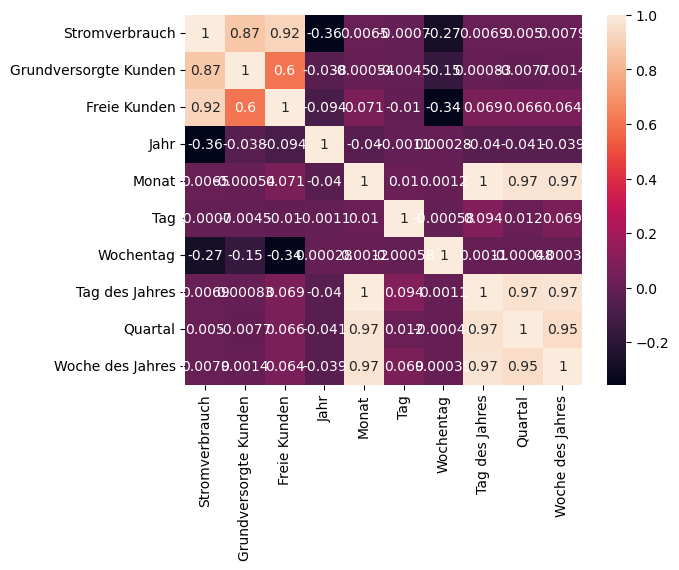

In [11]:
sns.heatmap(corr, annot=True)

In [12]:
#MAX, MIN Values
for col in energy_data.select_dtypes(include=['number']).columns:
    idx = energy_data[col].idxmax()
    print(f"{col}: Index={idx}, Wert={energy_data.loc[idx, col]}")

Stromverbrauch: Index=459451, Wert=68374.4425
Grundversorgte Kunden: Index=168290, Wert=26089.633
Freie Kunden: Index=112068, Wert=32296.454
Jahr: Index=0, Wert=2025
Monat: Index=26108, Wert=12
Tag: Index=2784, Wert=31
Wochentag: Index=96, Wert=6
Tag des Jahres: Index=26108, Wert=366
Quartal: Index=26108, Wert=4
Woche des Jahres: Index=166060, Wert=53


In [13]:
summary = {
    "Anzahl Zeilen": len(energy_data),
    "Anzahl Spalten": len(energy_data.columns),
    "Fehlende Werte (gesamt)": energy_data.isnull().sum().sum(),
    "Numerische Spalten": list(energy_data.select_dtypes(include=['number']).columns)
}
print(summary)

{'Anzahl Zeilen': 481959, 'Anzahl Spalten': 12, 'Fehlende Werte (gesamt)': np.int64(601840), 'Numerische Spalten': ['Stromverbrauch', 'Grundversorgte Kunden', 'Freie Kunden', 'Jahr', 'Monat', 'Tag', 'Wochentag', 'Tag des Jahres', 'Quartal', 'Woche des Jahres']}


In [14]:
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Stromverbrauch,481959.0,38454.337193,9053.026326,22322.879,30752.445525,37427.5125,45085.0660,68374.4425
Grundversorgte Kunden,184015.0,15787.695773,3556.734093,0.000,12608.322500,16034.1590,18365.2540,26089.6330
Freie Kunden,178063.0,19277.143512,4409.132362,0.000,15480.603000,18104.6810,23226.8105,32296.4540
Jahr,481959.0,2018.379207,3.969501,2012.000,2015.000000,2018.0000,2022.0000,2025.0000
Monat,481959.0,6.440363,3.424464,1.000,3.000000,6.0000,9.0000,12.0000
Tag,481959.0,15.724730,8.797658,1.000,8.000000,16.0000,23.0000,31.0000
Wochentag,481959.0,2.999645,2.000352,0.000,1.000000,3.0000,5.0000,6.0000
Tag des Jahres,481959.0,180.637961,104.709813,1.000,90.000000,180.0000,269.0000,366.0000
Quartal,481959.0,2.481155,1.108788,1.000,1.000000,2.0000,3.0000,4.0000
Woche des Jahres,481959.0,26.229783,14.950682,1.000,13.000000,26.0000,39.0000,53.0000


Join Weather Data and Energy Data

In [28]:
merged_weather_data = pd.concat([weather_data_2010, weather_data_2020], ignore_index=True)
merged_weather_data = merged_weather_data.sort_values(by=['Date', 'Time'], ascending=True).reset_index(drop=True)

In [ ]:
merged_weather_data.head()

,station_abbr,Date and Time,Date,Time,Lufttemperatur 2 m ü. Boden,Lufttemperatur 2 m ü. Gras,Lufttemperatur Bodenoberfläche,Chilltemperatur,relative Luftfeuchtigkeit,Taupunkt 2 m ü. Boden,...,Windrichtung; Zehnminutenmittel,Windgeschwindigkeit; Zehnminutenmittel in km/h,BÃ¶enspitze (3-SekundenbÃ¶e); Maximum in m/s,BÃ¶enspitze (SekundenbÃ¶e); Maximum in km/h,BÃ¶enspitze (3-SekundenbÃ¶e); Maximum in km/h,Niederschlag; Zehnminutensumme,Globalstrahlung; Zehnminutenmittel,Diffusstrahlung; Zehnminutenmittel,Langwellige Einstrahlung; Zehnminutenmittel,Sonnenscheindauer; Zehnminutensumme
0,BAS,01.01.2010 00:00,01.01.2010,00:00:00,4.5,2.8,2.5,2.5,94.8,3.7,...,108.0,8.3,4.1,15.5,14.8,0.0,0.0,18.0,253.0,0.0
1,BAS,01.01.2010 00:10,01.01.2010,00:10:00,4.2,2.9,2.5,1.9,96.2,3.6,...,105.0,9.4,4.3,16.2,15.5,0.0,0.0,19.0,252.0,0.0
2,BAS,01.01.2010 00:20,01.01.2010,00:20:00,4.0,2.7,2.3,1.9,96.2,3.5,...,100.0,8.3,3.7,13.7,13.3,0.0,0.0,19.0,260.0,0.0
3,BAS,01.01.2010 00:30,01.01.2010,00:30:00,4.3,3.2,2.9,3.1,96.1,3.7,...,108.0,5.4,2.8,10.4,10.1,0.0,0.0,20.0,321.0,0.0
4,BAS,01.01.2010 00:40,01.01.2010,00:40:00,4.3,3.6,3.5,3.1,96.3,3.8,...,96.0,5.4,2.6,9.7,9.4,0.0,0.0,19.0,321.0,0.0


In [ ]:
#save_path = os.path.join(fetch_directory, "data", "weather_complete.csv")
# weather_complete.to_csv(save_path, index=False)

Weather Data Analysis

In [18]:
merged_weather_data.info()
print(f"Energy Data Shape:", merged_weather_data.shape)
merged_weather_data.index


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788977 entries, 0 to 788976
Data columns (total 27 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   station_abbr                                                       788977 non-null  object 
 1   Date and Time                                                      788977 non-null  object 
 2   Date                                                               788977 non-null  object 
 3   Time                                                               788977 non-null  object 
 4   Lufttemperatur 2 m ü. Boden                                        788977 non-null  float64
 5   Lufttemperatur 2 m ü. Gras                                         788977 non-null  float64
 6   Lufttemperatur Bodenoberfläche                                     788976 non-null  float64
 7   Chilltemper

RangeIndex(start=0, stop=788977, step=1)

In [19]:
print("Summe aller 'Null' Werte:")
merged_weather_data.isnull().sum()

Summe aller 'Null' Werte:


station_abbr                                                            0
Date and Time                                                           0
Date                                                                    0
Time                                                                    0
Lufttemperatur 2 m ü. Boden                                             0
Lufttemperatur 2 m ü. Gras                                              0
Lufttemperatur Bodenoberfläche                                          1
Chilltemperatur                                                         1
relative Luftfeuchtigkeit                                               1
Taupunkt 2 m ü. Boden                                                 145
Dampfdruck 2 m ü. Boden                                               187
Luftrdruck auf Barometerhöhe                                          187
Luftdruck reduziert auf Meeresniveau mit Standardatmosphäre (QNH)     187
Luftdruck reduziert auf Meeresniveau (

In [ ]:
print(merged_weather_data.index)
print(merged_weather_data.isnull().sum())

RangeIndex(start=0, stop=788977, step=1)
station_abbr                                                            0
Date and Time                                                           0
Date                                                                    0
Time                                                                    0
Lufttemperatur 2 m ü. Boden                                             0
Lufttemperatur 2 m ü. Gras                                              0
Lufttemperatur Bodenoberfläche                                          1
Chilltemperatur                                                         1
relative Luftfeuchtigkeit                                               1
Taupunkt 2 m ü. Boden                                                 145
Dampfdruck 2 m ü. Boden                                               187
Luftrdruck auf Barometerhöhe                                          187
Luftdruck reduziert auf Meeresniveau mit Standardatmosphäre (QNH)     1

In [26]:
for col in merged_weather_data.select_dtypes(include=['number']).columns:
    print(f"{col}: min={merged_weather_data[col].min()} | max={merged_weather_data[col].max()} | mean={merged_weather_data[col].mean():.2f}")

Lufttemperatur 2 m ü. Boden: min=-19.3 | max=99.0 | mean=11.53
Lufttemperatur 2 m ü. Gras: min=-21.4 | max=287.0 | mean=11.65
Lufttemperatur Bodenoberfläche: min=-21.5 | max=293.0 | mean=12.29
Chilltemperatur: min=-26.3 | max=235.0 | mean=11.07
relative Luftfeuchtigkeit: min=-9.4 | max=981.2 | mean=73.92
Taupunkt 2 m ü. Boden: min=-26.7 | max=1018.9 | mean=6.63
Dampfdruck 2 m ü. Boden : min=0.7 | max=1030.3 | mean=13.32
Luftrdruck auf Barometerhöhe: min=0.0 | max=1029.3 | mean=979.76
Luftdruck reduziert auf Meeresniveau mit Standardatmosphäre (QNH): min=0.0 | max=1044.8 | mean=1017.36
Luftdruck reduziert auf Meeresniveau (QFF): min=0.0 | max=1046.9 | mean=1014.67
Böenspitze (Sekundenböe): min=0.0 | max=923.0 | mean=4.00
Windgeschwindigkeit vektoriell: min=0.0 | max=428.0 | mean=1.89
Windgeschwindigkeit skalar; Zehnminutenmittel in m/s: min=0.0 | max=736.0 | mean=2.68
Windrichtung; Zehnminutenmittel: min=0.0 | max=360.0 | mean=187.14
Windgeschwindigkeit; Zehnminutenmittel in km/h: min=0

In [27]:
summary = {
    "Anzahl Zeilen": len(merged_weather_data),
    "Anzahl Spalten": len(merged_weather_data.columns),
    "Fehlende Werte (gesamt)": merged_weather_data.isnull().sum().sum(),
    "Numerische Spalten": list(merged_weather_data.select_dtypes(include=['number']).columns)
}
print(summary)

{'Anzahl Zeilen': 788977, 'Anzahl Spalten': 27, 'Fehlende Werte (gesamt)': np.int64(21576), 'Numerische Spalten': ['Lufttemperatur 2 m ü. Boden', 'Lufttemperatur 2 m ü. Gras', 'Lufttemperatur Bodenoberfläche', 'Chilltemperatur', 'relative Luftfeuchtigkeit', 'Taupunkt 2 m ü. Boden', 'Dampfdruck 2 m ü. Boden ', 'Luftrdruck auf Barometerhöhe', 'Luftdruck reduziert auf Meeresniveau mit Standardatmosphäre (QNH)', 'Luftdruck reduziert auf Meeresniveau (QFF)', 'Böenspitze (Sekundenböe)', 'Windgeschwindigkeit vektoriell', 'Windgeschwindigkeit skalar; Zehnminutenmittel in m/s', 'Windrichtung; Zehnminutenmittel', 'Windgeschwindigkeit; Zehnminutenmittel in km/h', 'BÃ¶enspitze (3-SekundenbÃ¶e); Maximum in m/s', 'BÃ¶enspitze (SekundenbÃ¶e); Maximum in km/h', 'BÃ¶enspitze (3-SekundenbÃ¶e); Maximum in km/h', 'Niederschlag; Zehnminutensumme', 'Globalstrahlung; Zehnminutenmittel', 'Diffusstrahlung; Zehnminutenmittel', 'Langwellige Einstrahlung; Zehnminutenmittel', 'Sonnenscheindauer; Zehnminutensumme']

Data Analysis Energy & Weather Data merged

In [ ]:
print("aktuelle cwd", os.getcwd())
print("Inhalt cwd:", os.listdir())
print("'data' existier im cwd?:", os.path.exists('data'))
if os.path.exists('data'):
    print("Dateien in 'data':", os.listdir('data'))

aktuelle cwd c:\Users\Kerem Akkaya\Python Project\Energy-Forecasting-Anomaly-Detection-Basel\Business_und_Data_Understanding
Inhalt cwd: ['Data analyse 29.10.2025.py', 'data_analysis 29.10.2025.py', 'data_analysis_energy.py', 'data_analysis_weather.py', 'data_manipulation.py', 'Datenanalyse.ipynb']
'data' existier im cwd?: False


In [ ]:
data_file = Path.cwd() / "251006_StromverbrauchBasel2012-2025.csv"
print("Erwarteter Pfad:", data_file)
print("Exisitiert?", data_file.exists())

Erwarteter Pfad: c:\Users\Kerem Akkaya\Python Project\Energy-Forecasting-Anomaly-Detection-Basel\Business_und_Data_Understanding\251006_StromverbrauchBasel2012-2025.csv
Exisitiert? False
